## &#128205; Basic Setups

In [2]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [4]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

'C:\\Users\\슝\\GH\\Session 03. 데이터 시각화'

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [5]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [6]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [7]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [8]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [7]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [8]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [9]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [9]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [8]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. QUEST

### 3.1 

연령대(ex.10,20,30,40대) 변수와 함께 어떤 변수와의 관계를 보면 좋을지 기대 가설을 세우고, 적절한 방식으로 시각화 후 해석 보태 주세요.
연령은 25세, 26세~ 아닌 20대의 BIN 형태 연령대 (범주형 변수)로 묶어주세요.

[참고](https://nittaku.tistory.com/124)

In [10]:
# 기대가설 - 연령대별로 trip_duration은 어떻게 다를까? 
# 연도->연령
df['Age']=2019 - df['birth_year'] + 1
df['Age'].head()

0    75
1    22
2    66
3    57
4    55
Name: Age, dtype: int64

In [10]:
df

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,Age
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36,75
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29,22
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,66
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,57
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,55
5,2018-05-01,2018-05-01,4,4,402,492,W 33 St & 7 Ave,40.750200,-73.990931,3443,W 52 St & 6 Ave,40.761330,-73.979820,25151,Subscriber,1967,male,16,53
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,50
7,2018-05-01,2018-05-01,1,1,382,3158,W 63 St & Broadway,40.771639,-73.982614,3172,W 74 St & Columbus Ave,40.778567,-73.977550,26354,Subscriber,1971,male,11,49
8,2018-05-01,2018-05-01,0,1,523,3659,W 17 St & 9 Ave,40.742949,-74.004137,267,Broadway & W 36 St,40.750977,-73.987654,17617,Subscriber,1980,male,41,40
9,2018-05-01,2018-05-01,2,2,90,3351,E 102 St & 1 Ave,40.786995,-73.941648,3391,E 106 St & 1 Ave,40.789253,-73.939562,29386,Subscriber,1984,male,53,36


In [11]:
df.Age

0        75
1        22
2        66
3        57
4        55
5        53
6        50
7        49
8        40
9        36
10       32
11       31
12       28
13       28
14       27
15       27
16       74
17       22
18       53
19       52
20       51
21       51
22       44
23       42
24       39
25       37
26       36
27       32
28       31
29       28
         ..
72005    38
72006    38
72007    38
72008    35
72009    35
72010    34
72011    34
72012    33
72013    33
72014    33
72015    32
72016    32
72017    32
72018    31
72019    31
72020    31
72021    31
72022    31
72023    30
72024    30
72025    30
72026    30
72027    29
72028    28
72029    28
72030    26
72031    26
72032    45
72033    48
72034    27
Name: Age, Length: 72035, dtype: int64

In [11]:
cut_point = df['Age'].quantile(0.99)
cut_point2 = df['Age'].quantile(0.01)
df=df[df['Age'] < cut_point]
df=df[df['Age'] > cut_point2]

In [12]:
df.Age.describe()

count    70474.000000
mean        41.848441
std         11.054973
min         23.000000
25%         32.000000
50%         40.000000
75%         51.000000
max         70.000000
Name: Age, dtype: float64

In [13]:
bins = [20,30,40,50,60,70]

In [14]:
cats = pd.cut(df.Age,bins)
cats

2        (60, 70]
3        (50, 60]
4        (50, 60]
5        (50, 60]
6        (40, 50]
7        (40, 50]
8        (30, 40]
9        (30, 40]
10       (30, 40]
11       (30, 40]
12       (20, 30]
13       (20, 30]
14       (20, 30]
15       (20, 30]
18       (50, 60]
19       (50, 60]
20       (50, 60]
21       (50, 60]
22       (40, 50]
23       (40, 50]
24       (30, 40]
25       (30, 40]
26       (30, 40]
27       (30, 40]
28       (30, 40]
29       (20, 30]
30       (20, 30]
31       (20, 30]
32       (20, 30]
33       (30, 40]
           ...   
72005    (30, 40]
72006    (30, 40]
72007    (30, 40]
72008    (30, 40]
72009    (30, 40]
72010    (30, 40]
72011    (30, 40]
72012    (30, 40]
72013    (30, 40]
72014    (30, 40]
72015    (30, 40]
72016    (30, 40]
72017    (30, 40]
72018    (30, 40]
72019    (30, 40]
72020    (30, 40]
72021    (30, 40]
72022    (30, 40]
72023    (20, 30]
72024    (20, 30]
72025    (20, 30]
72026    (20, 30]
72027    (20, 30]
72028    (20, 30]
72029    (

In [15]:
group_names=["20s","30s","40s","50s","60 over"]

In [16]:
df['cats2'] = pd.cut(df.Age,bins,labels=group_names)

In [17]:
df

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,Age,cats2
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,66,60 over
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,57,50s
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,55,50s
5,2018-05-01,2018-05-01,4,4,402,492,W 33 St & 7 Ave,40.750200,-73.990931,3443,W 52 St & 6 Ave,40.761330,-73.979820,25151,Subscriber,1967,male,16,53,50s
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,50,40s
7,2018-05-01,2018-05-01,1,1,382,3158,W 63 St & Broadway,40.771639,-73.982614,3172,W 74 St & Columbus Ave,40.778567,-73.977550,26354,Subscriber,1971,male,11,49,40s
8,2018-05-01,2018-05-01,0,1,523,3659,W 17 St & 9 Ave,40.742949,-74.004137,267,Broadway & W 36 St,40.750977,-73.987654,17617,Subscriber,1980,male,41,40,30s
9,2018-05-01,2018-05-01,2,2,90,3351,E 102 St & 1 Ave,40.786995,-73.941648,3391,E 106 St & 1 Ave,40.789253,-73.939562,29386,Subscriber,1984,male,53,36,30s
10,2018-05-01,2018-05-01,0,1,2057,537,Lexington Ave & E 24 St,40.740259,-73.984092,3593,31 St & Broadway,40.761584,-73.925921,29194,Subscriber,1988,male,23,32,30s
11,2018-05-01,2018-05-01,1,1,1303,387,Centre St & Chambers St,40.712733,-74.004607,3417,Baltic St & 5 Ave,40.679577,-73.978550,29968,Subscriber,1989,male,7,31,30s


In [18]:
cats.value_counts()

(30, 40]    22790
(50, 60]    16813
(40, 50]    13948
(20, 30]    12838
(60, 70]     4085
Name: Age, dtype: int64

In [19]:
df['trip_duration_min']=df['trip_duration'] / 60

In [20]:
cut_point = df['trip_duration_min'].quantile(0.99)
cut_point2 = df['trip_duration_min'].quantile(0.01)
df=df[df['trip_duration_min'] < cut_point]
df=df[df['trip_duration_min'] > cut_point2]

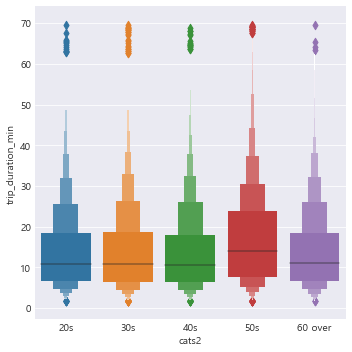

In [67]:
sns.catplot(x='cats2' ,y='trip_duration_min',kind='boxen',data=df)
plt.show()

**해석 보태기**
> 50대 분포가 가장 눈에 띄는데, 다른 나이대에 비해 주행시간의 분포가 넓으며 중앙값도 높은것으로 보인다. 

### 3.2

Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. trip_duration은 평균(mean)이어도 좋고, 누적(sum)이어도 좋습니다. 해석 보태 주세요.
Groupby 함수 사용해주시면 편합니다.



In [21]:
trip_duration_mean = df.groupby('bike_id').mean()['trip_duration_min']
trip_duration_mean 

bike_id
14529    17.762500
14530    14.506250
14532    27.650000
14533    17.542857
14534     9.933333
14537    22.240000
14540    16.375000
14541    18.266667
14545    22.325000
14547    14.195833
14550    14.355556
14551     8.291667
14552    26.945833
14553    13.890000
14555    30.444444
14556    11.118519
14558    17.908333
14561    28.591667
14562    11.450000
14563     3.366667
14565    11.570833
14566    10.437179
14567    12.590741
14568    11.353704
14572    10.894444
14573    17.504167
14579    15.846667
14580    13.577778
14581     6.275000
14582    18.300000
           ...    
33458     8.319048
33459    13.705556
33460    12.150000
33461    11.995833
33464    15.225641
33465    10.778571
33466     9.272222
33467     7.878571
33469    21.577778
33473    12.685897
33481    10.678571
33519    11.586667
33521    11.146212
33522    21.273611
33528    12.752083
33529    15.247917
33530    17.220000
33532     2.683333
33533    20.788889
33539    17.422222
33540    29.233333
3354

In [22]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df['bike_id'].value_counts().nlargest(10).index
df_top=df[df['bike_id'].isin(top_list)]

In [27]:
trip_duration_mean = df_top.groupby('bike_id').mean()['trip_duration_min']
df_top = pd.DataFrame(trip_duration_mean)

<Figure size 1440x864 with 0 Axes>

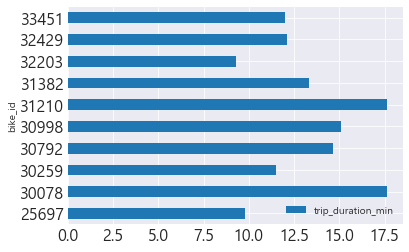

In [28]:
plt.figure(figsize=(20,12))
df_top.plot(kind='barh',fontsize=16)
plt.show()

**해석 보태기**
> 바이크 아이디가 30078과 31210인 자전거가 이 중에서 가장 주행 평균 시간이 높은것으로 확인된다.

### 3.3

Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 해석은 안 보태 주셔도 됩니다.

In [79]:
# 핵심은 groupby
base=df_top.groupby(['bike_id','start_hour'])['trip_duration_min'].count().unstack()
base

start_hour,0,4,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
bike_id,,,,,,,,,,,,,,,,,,,,,
25697,NaN,NaN,NaN,2.0,1.0,1.0,4.0,1.0,NaN,2.0,...,2.0,NaN,3.0,4.0,2.0,3.0,2.0,4.0,1.0,NaN
30078,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,3.0,...,NaN,3.0,1.0,NaN,3.0,1.0,2.0,1.0,1.0,1.0
30259,NaN,NaN,NaN,1.0,1.0,2.0,3.0,2.0,3.0,2.0,...,2.0,2.0,NaN,2.0,1.0,3.0,2.0,NaN,NaN,NaN
30792,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,4.0,1.0,...,2.0,1.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,NaN
30998,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0
31210,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,3.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN
31382,NaN,1.0,1.0,2.0,2.0,1.0,NaN,NaN,2.0,3.0,...,2.0,3.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN
32203,NaN,NaN,NaN,NaN,2.0,3.0,1.0,2.0,2.0,3.0,...,NaN,NaN,3.0,2.0,5.0,NaN,NaN,NaN,1.0,NaN
32429,1.0,NaN,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,...,NaN,NaN,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN


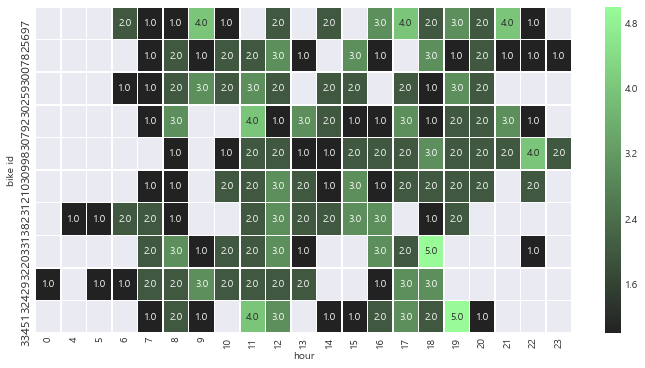

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f',
           cmap=pal) # 소수점 자리 처리
plt.ylabel('bike id')
plt.xlabel('hour') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)# x축에 종류가 많으니까 label 돌려주기
plt.show()

# heatmap이 아래 위로 잘린다면 현 matplotlib 3.1.1 의 오류
# This was a matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 (still forthcoming). 
# For now the fix is to downgrade matplotlib to a prior version.

**해석 보태기**
> 히트맵에서 눈에 띄는 부분은 7시대가 가장 이용 시작하는 것이 많아 보인다는 점을 알 수 있다. 아마도 출근 시간대 이용 때문이라고 추측해 볼 수 있을 것 같다.